In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
d=pd.read_excel("data.xlsx",sheet_name=2)
d

,tau,Unnamed: 1,Tm,nu1,nu2,dnu,ob,kHz,mks
0,100,2,200,5.000,10.000,5.000,0.200000,NaN,NaN
1,100,12,1200,0.822,1.649,0.827,1.209190,NaN,NaN
2,100,20,2000,0.493,1.009,0.516,1.937984,NaN,NaN
3,100,30,3000,0.332,0.665,0.333,3.003003,NaN,NaN
4,100,40,4000,0.240,0.504,0.264,3.787879,NaN,NaN
5,100,50,5000,0.206,0.412,0.206,4.854369,NaN,NaN


In [27]:
def getkb(X,Y):
    k=(np.average(Y*X)-np.average(Y)*np.average(X))/(np.average(X*X)-np.average(X)**2)
    b=np.average(Y)-k*np.average(X)
    def av(n):
        return np.average(n)
    sigk=np.sqrt(np.abs((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k))/np.sqrt(X.shape[0])
    #print((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k)
    sigb=sigk*np.sqrt(av(X*X)-av(X)**2)
    return np.array([k,b,np.abs(sigk/k),np.abs(sigb/b)])

In [28]:
k,b,ks,bs=getkb(1/d.Tm,d.dnu)

In [29]:
k,b,ks,bs

(np.float64(998.4488548022528),
 np.float64(0.006728719442883557),
 np.float64(0.0017969520569312645),
 np.float64(0.4581926432484401))

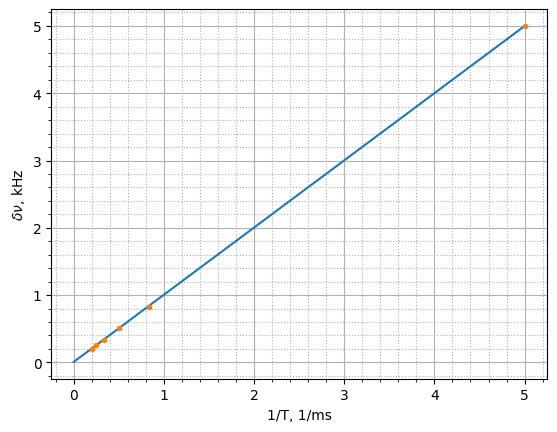

In [31]:
x=np.linspace(0,np.max(1/d.Tm))
plt.plot(x*1000,k*x+b)
plt.plot(1000/d.Tm,d.dnu,'.')
plt.xlabel("1/T, 1/ms")
plt.ylabel(r"$\delta\nu$, kHz")
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
#plt.legend()
plt.savefig("ks.eps")

In [16]:
d=pd.read_excel("data.xlsx",sheet_name=3)
d

,tau,dnu
0,50,20
1,40,25
2,20,50
3,100,10


In [21]:
k,b,ks,bs=getkb(1/d.tau,d.dnu)
k,b,ks,bs

(np.float64(999.9999999999992),
 np.float64(2.1316282072803006e-14),
 np.float64(1.5258789062500014e-08),
 np.float64(10549357.837892836))

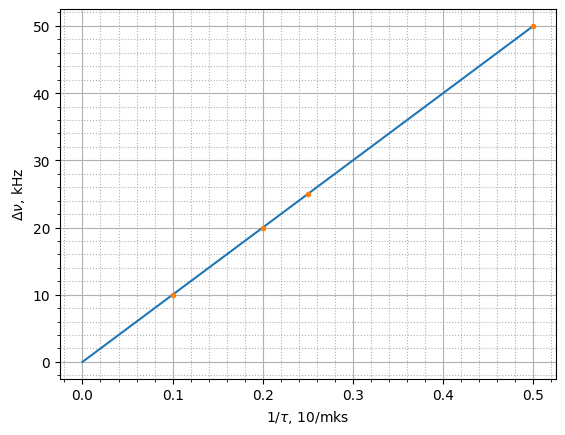

In [25]:
x=np.linspace(0,np.max(1/d.tau))
plt.plot(x*10,k*x+b)
plt.plot(1/d.tau*10,d.dnu,'.')
plt.xlabel(r"1/$\tau$, 10/mks")
plt.ylabel(r"$\Delta\nu$, kHz")
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
#plt.legend()
plt.savefig("ks1.eps")

In [33]:
d=pd.read_excel("data.xlsx",sheet_name=7)
d

,n,a_0,a_f
0,1,108,99
1,2,106,45
2,3,102,31
3,4,101,21
4,5,96,20
5,6,91,15
6,7,85,9


In [34]:
m=d.a_f/d.a_0
m

0    0.916667
1    0.424528
2    0.303922
3    0.207921
4    0.208333
5    0.164835
6    0.105882
dtype: float64

In [71]:
k,b,ks,bs=getkb(d.n**2,m**-2)
k,b,ks,bs

(np.float64(1.58198035058141),
 np.float64(-4.534115313391265),
 np.float64(0.14470099952761897),
 np.float64(0.8265087427995267))

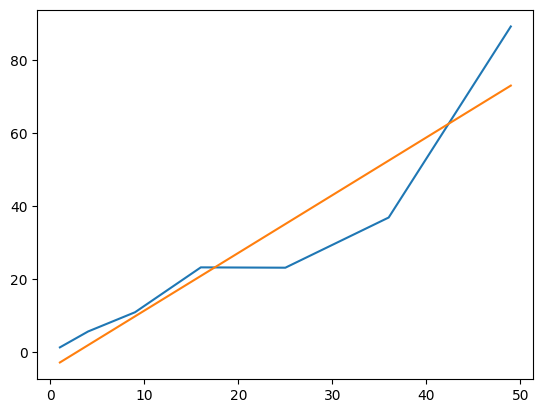

In [73]:
plt.plot(d.n**2,m**-2)
plt.plot(d.n**2,d.n**2*k+b)

In [93]:
R=3e3
C=1e-9
w2=333333*2*np.pi*(np.arange(7))
w2

array([       0.        ,  2094393.00799809,  4188786.01599619,
        6283179.02399428,  8377572.03199237, 10471965.03999047,
       12566358.04798856])

In [94]:
1/np.sqrt((w*R*C)**2+1)

array([1.        , 0.99995558, 0.99982236, ..., 0.01061185, 0.01061079,
       0.01060973])

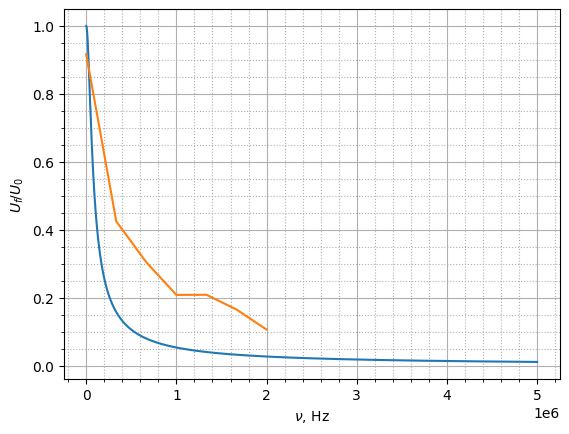

In [95]:
w=np.linspace(0,5e6,10000)*2*np.pi
plt.plot(w/(2*np.pi),1/np.sqrt((w*R*C)**2+1))
plt.plot(w2/(2*np.pi),m)
plt.xlabel(r"$\nu$, Hz")
plt.ylabel(r"$U_f/U_0$")
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
#plt.legend()
plt.savefig("ks5.eps")

In [56]:
w/(2*np.pi)

array([      0.        ,  333333.33333333,  666666.66666667,
       1000000.        , 1333333.33333333, 1666666.66666667,
       2000000.        ])

In [51]:
5/15*10e6

3333333.333333333